## Import Library and Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/fadilmr/CaseBased2/main/water-treatment.csv

--2022-12-02 02:04:41--  https://raw.githubusercontent.com/fadilmr/CaseBased2/main/water-treatment.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88780 (87K) [text/plain]
Saving to: ‘water-treatment.csv.4’

water-treatment.csv 100%[===================>]  86.70K  --.-KB/s    in 0.01s   

2022-12-02 02:04:41 (6.31 MB/s) - ‘water-treatment.csv.4’ saved [88780/88780]



## Read Dataset

In [ ]:
df = pd.read_csv('water-treatment.csv')
df.head()

,Days,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.5,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70,?,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,?,62.7,95.6,?,71,92.1,78.2,87.5,99.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

In [ ]:
df.describe()

,PH-E,COND-E,PH-P,SS-P,COND-P,PH-D,COND-D
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,7.810057,1478.620493,7.829981,253.952562,1496.034156,7.811954,1490.569260
std,0.246175,394.898019,0.226925,147.458468,402.588656,0.199594,399.990816
min,6.900000,651.000000,7.300000,104.000000,646.000000,7.100000,85.000000
25%,7.600000,1201.000000,7.700000,184.000000,1217.000000,7.700000,1225.500000
50%,7.800000,1406.000000,7.800000,220.000000,1420.000000,7.800000,1428.000000
75%,8.000000,1672.000000,8.000000,272.000000,1713.500000,7.900000,1701.000000
max,8.700000,3230.000000,8.500000,1692.000000,3170.000000,8.400000,3690.000000


## Pre-Processing

In [ ]:
df.columns[df.isin(["?"]).any()]
df = df.replace('?',np.nan)

In [ ]:
df.head()

,Days,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.5,7.8,NaN,407,166,66.3,4.5,2110,...,2000,NaN,58.8,95.5,NaN,70,NaN,79.4,87.3,99.6
1,D-2/3/90,39024,3,7.7,NaN,443,214,69.2,6.5,2660,...,2590,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100
2,D-4/3/90,32229,5,7.6,NaN,528,186,69.9,3.4,1666,...,1888,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023,3.5,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.5,8.0,242,496,176,64.8,4,2110,...,2120,NaN,62.7,95.6,NaN,71,92.1,78.2,87.5,99.5


In [ ]:
df.isna().sum()

Days         0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
df_temp = df.set_index('Days', inplace=False)
df_temp = df_temp.astype(float)

In [ ]:
df_temp

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
Days,,,,,,,,,,,,,,,,,,,,,
D-1/3/90,44101.0,1.50,7.8,NaN,407.0,166.0,66.3,4.5,2110.0,7.9,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
D-2/3/90,39024.0,3.00,7.7,NaN,443.0,214.0,69.2,6.5,2660.0,7.7,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
D-4/3/90,32229.0,5.00,7.6,NaN,528.0,186.0,69.9,3.4,1666.0,7.7,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
D-5/3/90,35023.0,3.50,7.9,205.0,588.0,192.0,65.6,4.5,2430.0,7.8,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
D-6/3/90,36924.0,1.50,8.0,242.0,496.0,176.0,64.8,4.0,2110.0,7.9,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D-26/8/91,32723.0,0.16,7.7,93.0,252.0,176.0,56.8,2.3,894.0,7.7,...,942.0,NaN,62.3,93.3,69.8,75.9,79.6,78.6,96.6,99.6
D-27/8/91,33535.0,0.32,7.8,192.0,346.0,172.0,68.6,4.0,988.0,7.8,...,950.0,NaN,58.3,97.8,83.0,59.1,91.1,74.6,90.7,100.0
D-28/8/91,32922.0,0.30,7.4,139.0,367.0,180.0,64.4,3.0,1060.0,7.5,...,1136.0,NaN,65.0,97.1,76.2,66.4,82.0,77.1,88.9,99.0


In [ ]:
values = {"Q-E": df_temp['Q-E'].mean(), "ZN-E": df_temp['ZN-E'].mean(), "DBO-E ": df_temp['DBO-E'].mean(), "DQO-E ": df_temp['DQO-E'].mean(), "SS-E" : df_temp['SS-E'].mean(), 
          "SSV-E" : df_temp['SSV-E'].mean(), "SED-E" : df_temp['SED-E'].mean(), "DBO-P" : df_temp['DBO-P'].mean(), "SSV-P" : df_temp['SSV-P'].mean(), "SED-P" : df_temp['SED-P'].mean(),
          "DBO-D" : df_temp['DBO-D'].mean(), "DQO-D" : df_temp['DQO-D'].mean(), "SS-D" : df_temp['SS-D'].mean(), "SSV-D" : df_temp['SSV-D'].mean(), "SED-D" : df_temp['SED-D'].mean(),
          "PH-S" : df_temp['PH-S'].mean(), "DBO-S" : df_temp['DBO-S'].mean(), "DQO-S" : df_temp['DQO-S'].mean(), "SS-S" : df_temp['SS-S'].mean(), "SSV-S" : df_temp['SSV-S'].mean(),
          "SED-S" : df_temp['SED-S'].mean(), "COND-S" : df_temp['COND-S'].mean(), "SSV-S" : df_temp['RD-DBO-P'].mean(), "RD-DBO-P" : df_temp['RD-DBO-P'].mean(), "RD-SS-P" : df_temp['RD-SS-P'].mean(),
          "RD-SED-P" : df_temp['RD-SED-P'].mean(), "RD-SED-P" : df_temp['RD-SED-P'].mean(), "RD-DBO-S" : df_temp['RD-DBO-S'].mean(), "RD-DQO-S" : df_temp['RD-DQO-S'].mean(), "RD-DBO-G" : df_temp['RD-DBO-G'].mean(),
          "RD-DQO-G" : df_temp['RD-DQO-G'].mean(), "RD-SS-G" : df_temp['RD-SS-G'].mean(), "RD-SED-G" : df_temp['RD-SED-G'].mean()}

In [ ]:
df_temp = df_temp.fillna(value=values)

In [ ]:
df_temp.isna().sum()

Q-E          0
ZN-E         0
PH-E         0
DBO-E       23
DQO-E        6
SS-E         0
SSV-E        0
SED-E        0
COND-E       0
PH-P         0
DBO-P        0
SS-P         0
SSV-P        0
SED-P        0
COND-P       0
PH-D         0
DBO-D        0
DQO-D        0
SS-D         0
SSV-D        0
SED-D        0
COND-D       0
PH-S         0
DBO-S        0
DQO-S        0
SS-S         0
SSV-S        0
SED-S        0
COND-S       0
RD-DBO-P     0
RD-SS-P      0
RD-SED-P     0
RD-DBO-S     0
RD-DQO-S     0
RD-DBO-G     0
RD-DQO-G     0
RD-SS-G      0
RD-SED-G     0
dtype: int64

In [ ]:
df_temp['DBO-E'].fillna((df_temp['DBO-E'].mean()), inplace = True)
df_temp['DQO-E'].fillna((df_temp['DQO-E'].mean()), inplace = True)

In [ ]:
df_temp.isna().sum()

Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527 entries, D-1/3/90 to D-30/8/91
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Q-E       527 non-null    float64
 1   ZN-E      527 non-null    float64
 2   PH-E      527 non-null    float64
 3   DBO-E     527 non-null    float64
 4   DQO-E     527 non-null    float64
 5   SS-E      527 non-null    float64
 6   SSV-E     527 non-null    float64
 7   SED-E     527 non-null    float64
 8   COND-E    527 non-null    float64
 9   PH-P      527 non-null    float64
 10  DBO-P     527 non-null    float64
 11  SS-P      527 non-null    float64
 12  SSV-P     527 non-null    float64
 13  SED-P     527 non-null    float64
 14  COND-P    527 non-null    float64
 15  PH-D      527 non-null    float64
 16  DBO-D     527 non-null    float64
 17  DQO-D     527 non-null    float64
 18  SS-D      527 non-null    float64
 19  SSV-D     527 non-null    float64
 20  SED-D     527 non-null  

In [ ]:
df_temp.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6521.467717,2.741657,0.246175,60.690777,119.674524,135.811306,12.284760,2.677945,394.898019,0.226925,...,387.537253,13.893820,12.753775,8.712181,8.462875,11.326846,6.782899,8.675122,8.158851,4.323828
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32964.000000,0.900000,7.600000,148.000000,326.500000,170.000000,55.850000,3.200000,1201.000000,7.700000,...,1235.000000,31.150000,50.600000,88.900000,81.800000,63.400000,87.800000,74.250000,87.700000,99.200000
50%,36215.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.000000,4.500000,1406.000000,7.800000,...,1433.000000,39.085806,59.300000,93.300000,85.000000,69.300000,89.900000,78.700000,90.700000,99.700000
75%,41094.000000,3.000000,8.000000,222.000000,474.500000,242.000000,69.600000,5.500000,1672.000000,8.000000,...,1691.500000,47.650000,66.800000,95.700000,87.700000,75.000000,92.300000,83.200000,93.000000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


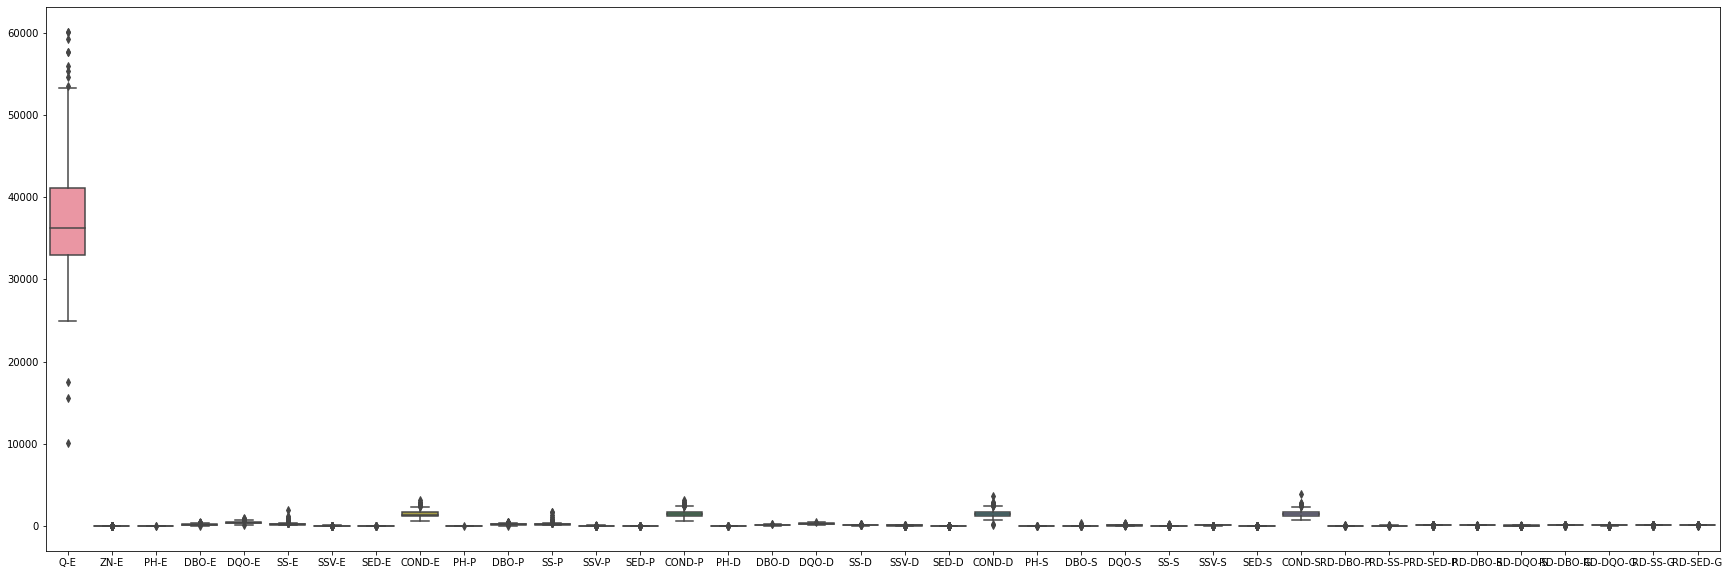

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_temp, dodge=False)

In [ ]:
def remove_outliers(df):
    df = df[(np.abs(df-df.mean()) <= (3*df.std()))]
    return df

In [ ]:
df_temp = remove_outliers(df_temp)
df_temp.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,519.000000,519.000000,525.000000,522.000000,522.000000,520.000000,519.000000,520.000000,523.000000,527.000000,...,522.000000,527.000000,524.000000,516.000000,521.000000,518.000000,520.000000,520.000000,519.000000,522.000000
mean,37149.880963,2.128569,7.810095,186.537219,402.565881,215.522009,62.033768,4.363357,1467.520076,7.829981,...,1480.342562,39.085806,58.789456,91.387720,84.099466,68.569018,89.615752,78.393874,89.692692,99.447845
std,5962.267290,1.851563,0.240294,56.690810,111.598994,76.628124,11.225034,1.596800,374.968516,0.226925,...,356.844564,13.893820,12.271028,6.273242,5.519793,9.786368,3.863614,7.296464,5.249226,1.005957
min,24978.000000,0.100000,7.200000,31.000000,81.000000,98.000000,25.500000,0.400000,651.000000,7.300000,...,683.000000,0.600000,21.200000,65.300000,58.500000,33.900000,70.800000,51.900000,66.200000,88.900000
25%,32987.000000,0.900000,7.600000,148.000000,325.250000,170.000000,56.350000,3.200000,1200.000000,7.700000,...,1234.000000,31.150000,50.700000,89.475000,82.000000,64.000000,88.000000,74.600000,87.800000,99.200000
50%,36182.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.300000,4.500000,1403.000000,7.800000,...,1430.500000,39.085806,59.400000,93.300000,85.000000,69.550000,89.900000,78.800000,90.700000,99.700000
75%,40928.000000,2.910000,8.000000,220.750000,472.750000,242.000000,69.700000,5.500000,1667.500000,8.000000,...,1682.750000,47.650000,66.900000,95.700000,87.800000,75.075000,92.300000,83.300000,93.100000,100.000000
max,55930.000000,10.000000,8.500000,365.000000,747.000000,616.000000,85.000000,11.000000,2660.000000,8.500000,...,2610.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


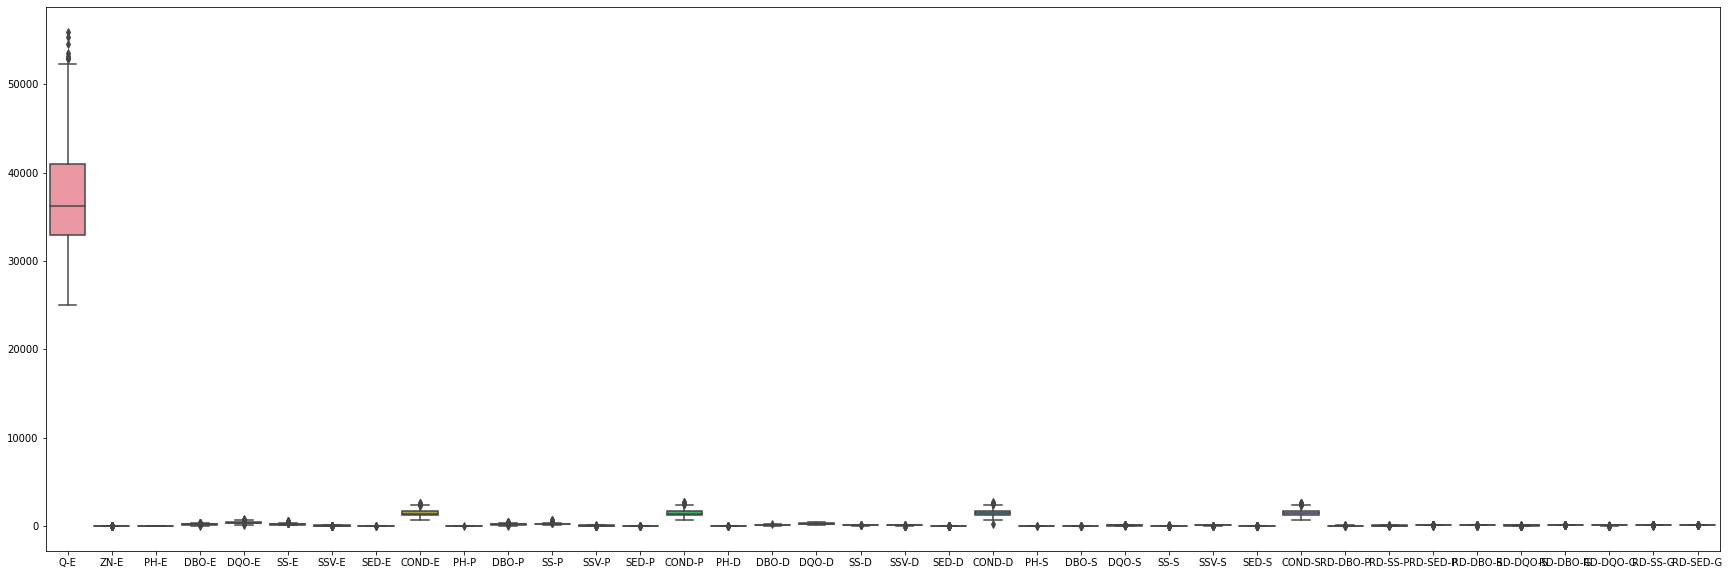

In [ ]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df_temp, dodge=False)

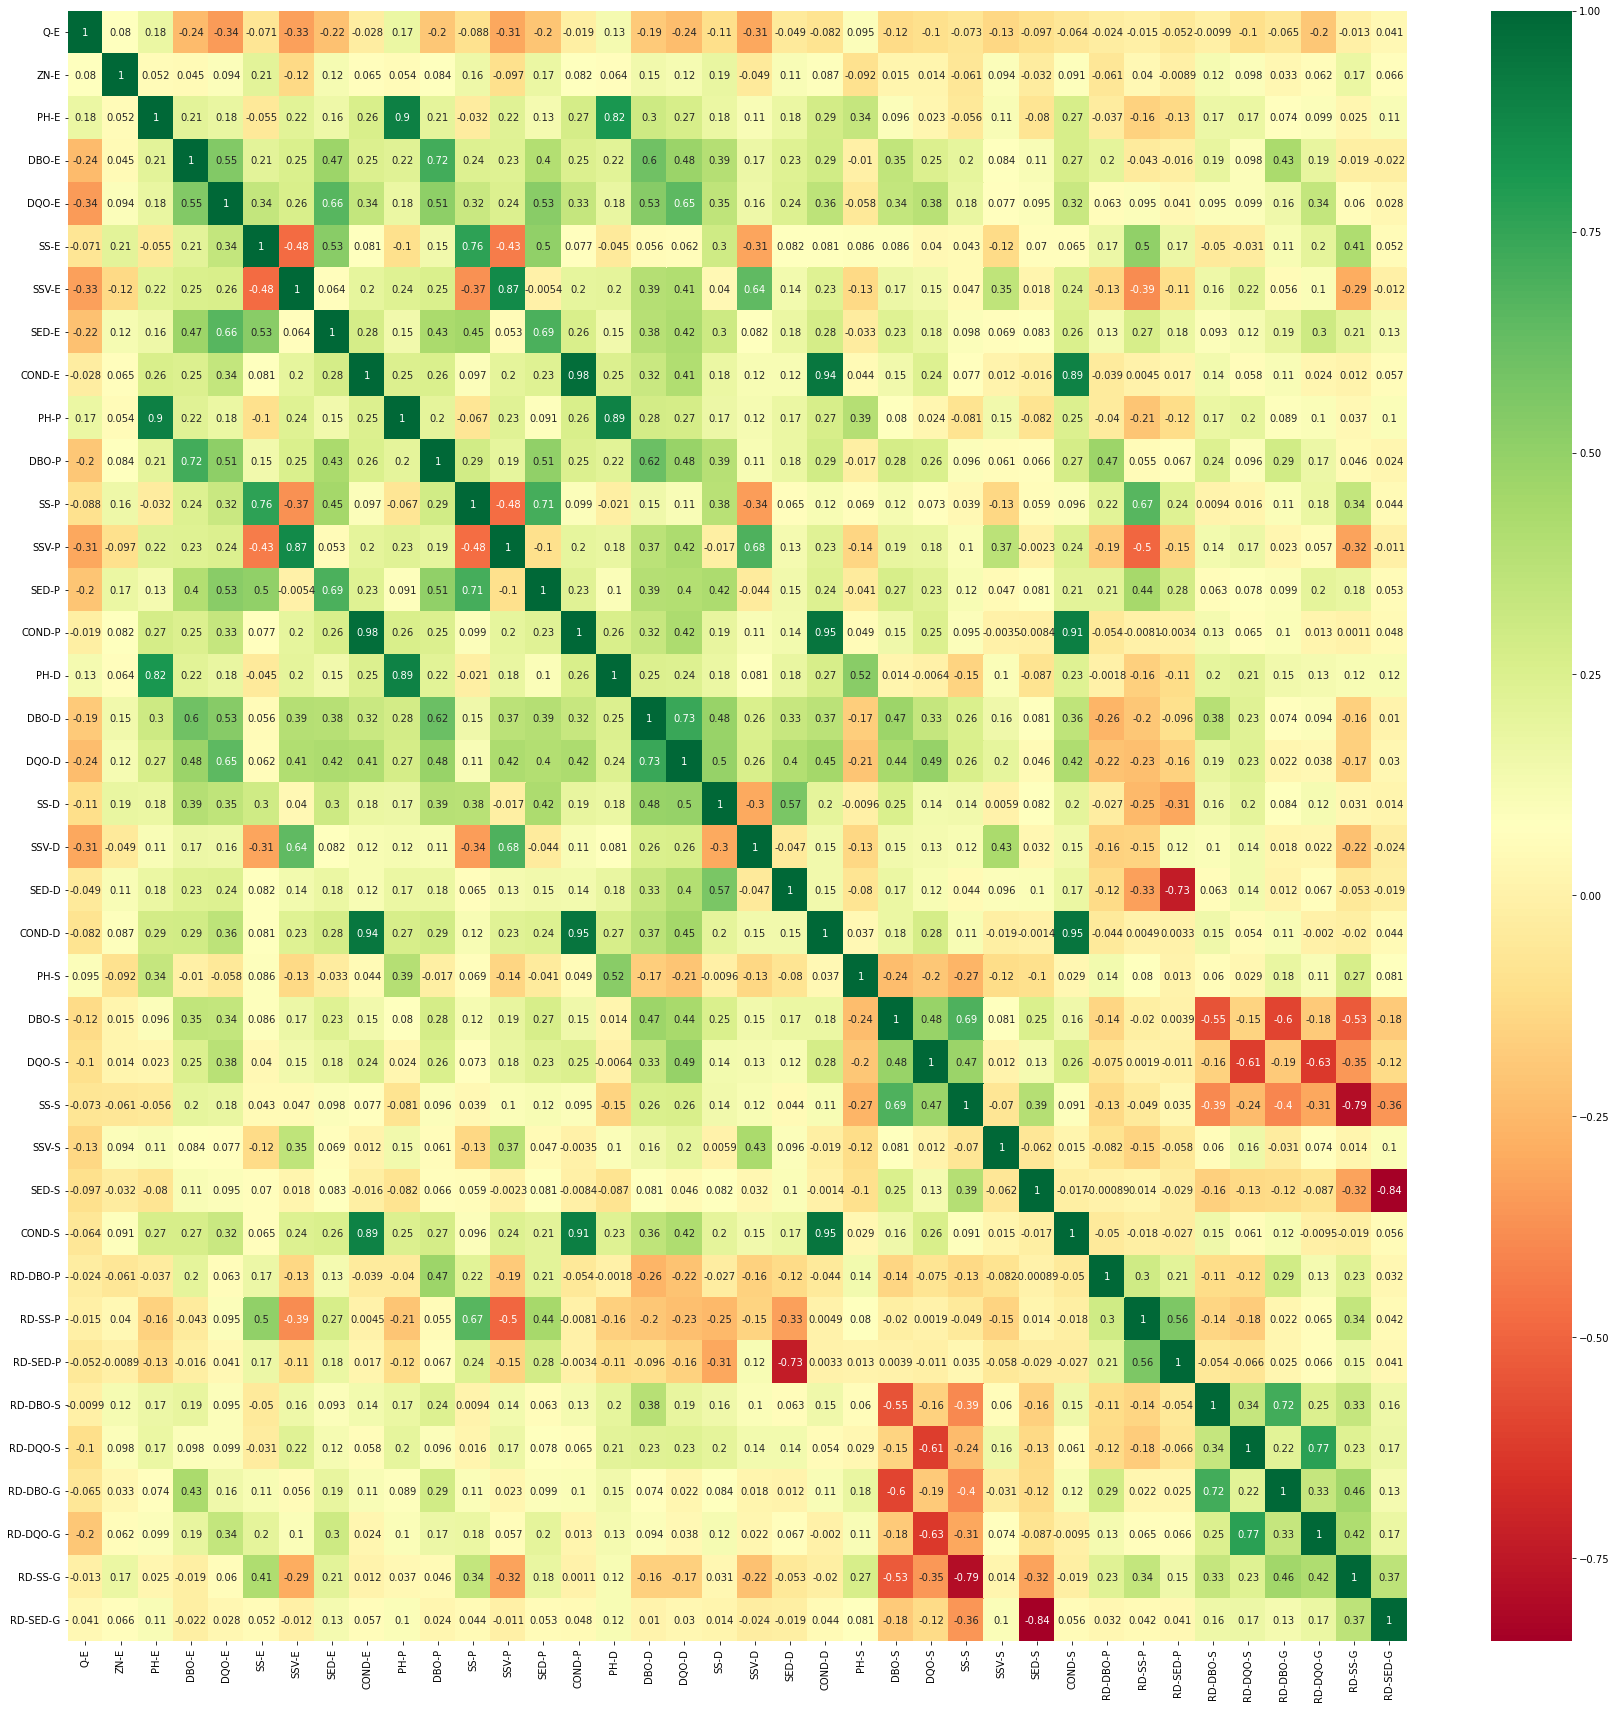

In [ ]:
corr = df_temp.corr()
top_corr_features = corr.index
plt.figure(figsize=(30,30))
g=sns.heatmap(corr,annot=True,cmap="RdYlGn")

In [ ]:
def select_feature(df, threshold):
    corr = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold:
                colname = cor_matrix.columns[i]
                corr.add(colname)
    return corr

In [ ]:
corr_features = select_feature(df_temp, 0.92)
corr_features, len(corr_features)

({'COND-D', 'COND-P', 'COND-S'}, 3)

In [ ]:
df_selected = df_temp[corr_features]

In [ ]:
df_scaled = ((df_selected - df_selected.min()) / (df_selected.max() - df_selected.min())) * 9 + 1
df_scaled.describe()

,COND-S,COND-P,COND-D
count,522.000000,522.000000,521.000000
mean,4.723966,4.700776,5.492547
std,1.666633,1.677472,1.392883
min,1.000000,1.000000,1.000000
25%,3.573430,3.500000,4.519765
50%,4.491178,4.413717,5.295627
75%,5.669305,5.663717,6.302355
max,10.000000,10.000000,10.000000


In [ ]:
df_scaled.isna().sum()

COND-S    5
COND-P    5
COND-D    6
dtype: int64

In [ ]:
df_scaled = df_scaled.dropna()

In [ ]:
df_scaled.isna().sum()

COND-S    0
COND-P    0
COND-D    0
dtype: int64

## Model

In [ ]:
def create_random_centroids(df, k):
    centroids = []
    for i in range(k):
        centroid = df.apply(lambda x : float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis = 1)

In [ ]:
def labelling(df, centroid):
    distance = centroid.apply(lambda x : np.sqrt(((df - x) ** 2).sum(axis = 1)))
    return distance.idxmin(axis = 1)

In [ ]:
# algoritma optimized
def new_centroid(df, label, k):
    return df.groupby(label).apply(lambda x : np.exp(np.log(x).mean())).T 

In [ ]:
def plot(df, label, centroid, n):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    centroid_2d = pca.fit_transform(centroid.T)
    plt.title(f'Iterasi {n}')
    plt.scatter(x = df_2d[:,0], y = df_2d[:,1], c = label)
    plt.scatter(x = centroid_2d[:,0], y = centroid_2d[:,1], marker = 'P', color = "red")
    plt.show()

In [ ]:
def kmeans(df, k, nmax, centroid, old_centroid):
    n = 1
    while n < nmax and not centroid.equals(old_centroid):
        old_centroid = centroid
        label = labelling(df, centroid)
        centroid = new_centroid(df, label, k)
        plot(df, label, centroid, n)
        n += 1
    return centroid

## Train Model

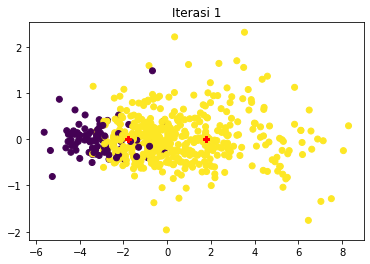

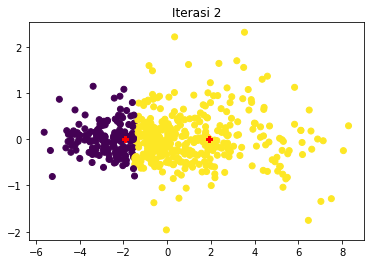

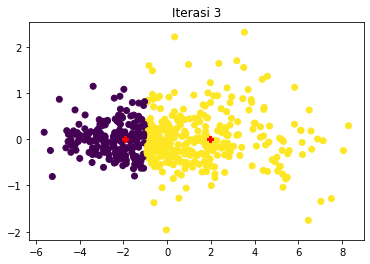

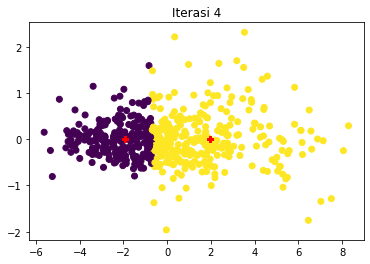

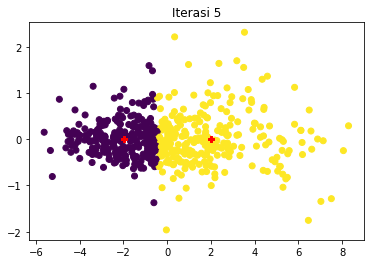

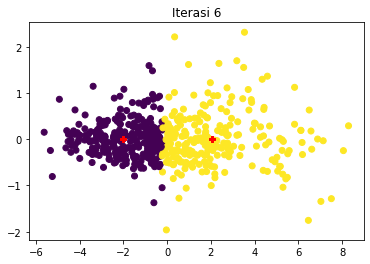

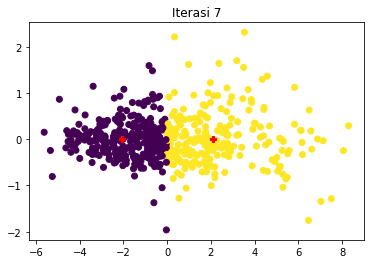

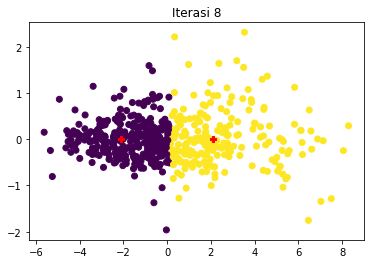

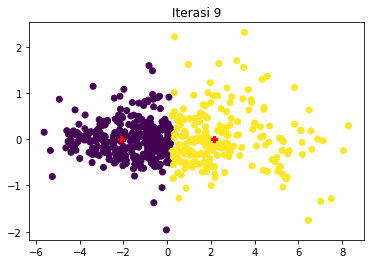

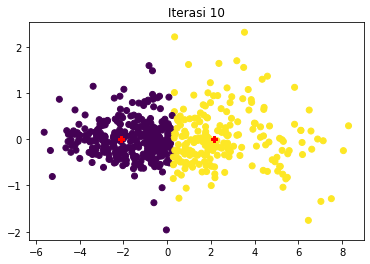

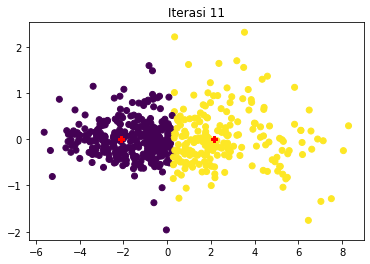

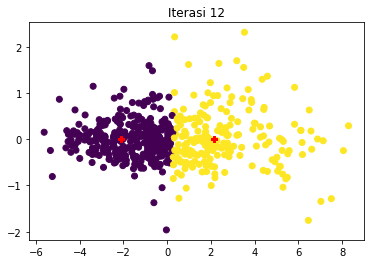

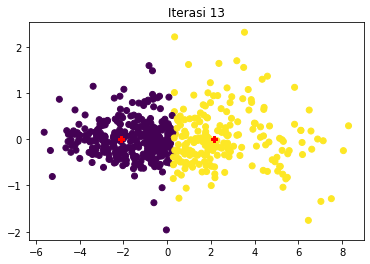

In [ ]:
centroid = create_random_centroids(df_scaled, 2)
old_centroid = pd.DataFrame()
result = kmeans(df_scaled, 2, 100, centroid, old_centroid)

In [ ]:
result

,0,1
COND-S,3.559350,6.136319
COND-P,3.519081,6.139679
COND-D,4.535052,6.703823


## Evaluation

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    distortions.append(kmeanModel.inertia_)

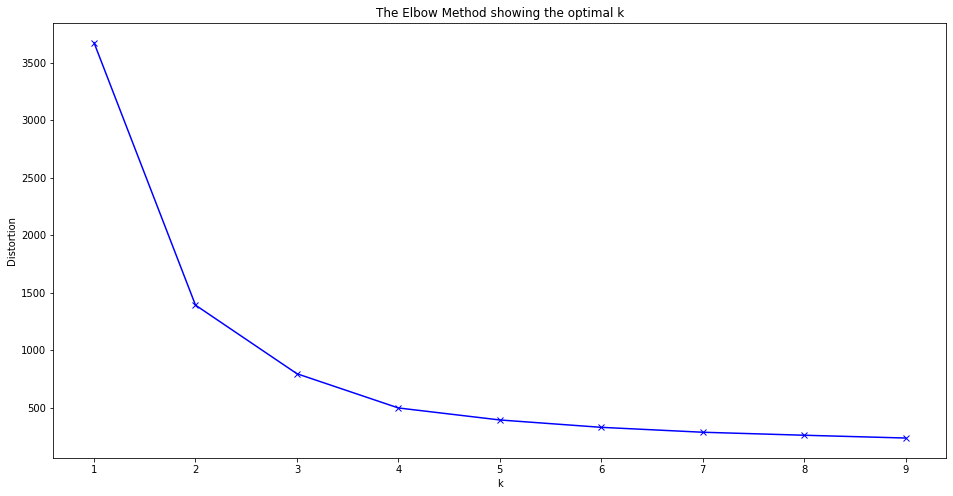

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

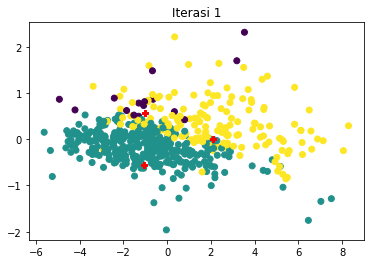

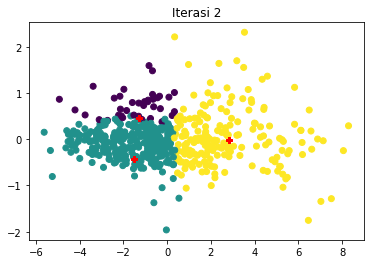

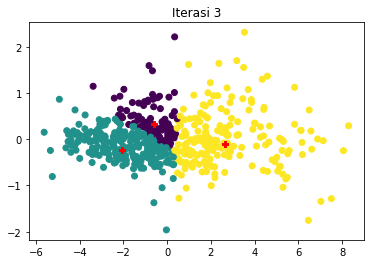

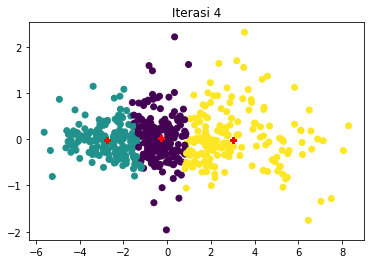

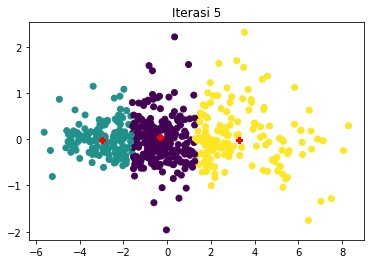

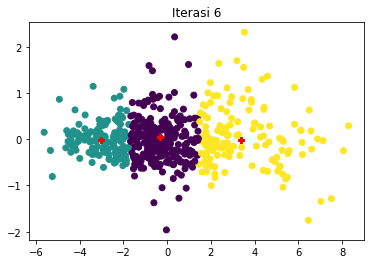

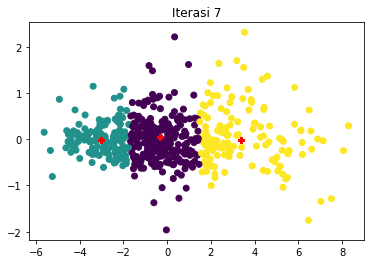

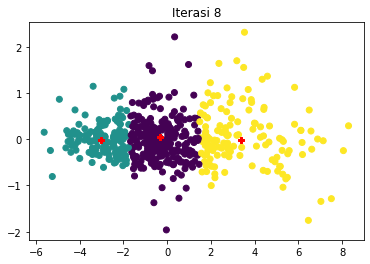

In [ ]:
centroid = create_random_centroids(df_scaled, 3)
old_centroid = pd.DataFrame()
result = kmeans(df_scaled, 3, 100, centroid, old_centroid)

In [ ]:
result

,0,1,2
COND-S,4.480517,2.840873,6.653450
COND-P,4.419416,2.802852,6.738750
COND-D,5.304916,3.871654,7.185851
